In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pylab
import warnings
warnings.filterwarnings('ignore')
import joblib

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Project thi KHDL/Data/Employee_Performance.xls')
pd.set_option('display.max_columns',None)
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


### Chuyển đổi đặc trưng phân loại thành số

In [ ]:
data.drop(['EmpNumber'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

object_columns_list = data.select_dtypes(include=['object']).columns.tolist()
print(object_columns_list)
label_encoder = LabelEncoder()

for column in object_columns_list:
    data[column] = label_encoder.fit_transform(data[column])
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(label_mapping)
    print(f"Column '{column}' has been encoded.")
    print("===================================================================================================")

['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']
{'Female': 0, 'Male': 1}
Column 'Gender' has been encoded.
{'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
Column 'EducationBackground' has been encoded.
{'Divorced': 0, 'Married': 1, 'Single': 2}
Column 'MaritalStatus' has been encoded.
{'Data Science': 0, 'Development': 1, 'Finance': 2, 'Human Resources': 3, 'Research & Development': 4, 'Sales': 5}
Column 'EmpDepartment' has been encoded.
{'Business Analyst': 0, 'Data Scientist': 1, 'Delivery Manager': 2, 'Developer': 3, 'Finance Manager': 4, 'Healthcare Representative': 5, 'Human Resources': 6, 'Laboratory Technician': 7, 'Manager': 8, 'Manager R&D': 9, 'Manufacturing Director': 10, 'Research Director': 11, 'Research Scientist': 12, 'Sales Executive': 13, 'Sales Representative': 14, 'Senior Developer': 15, 'Senior Manager R&D': 16, 'Technical

###Xử lý ngoại lệ

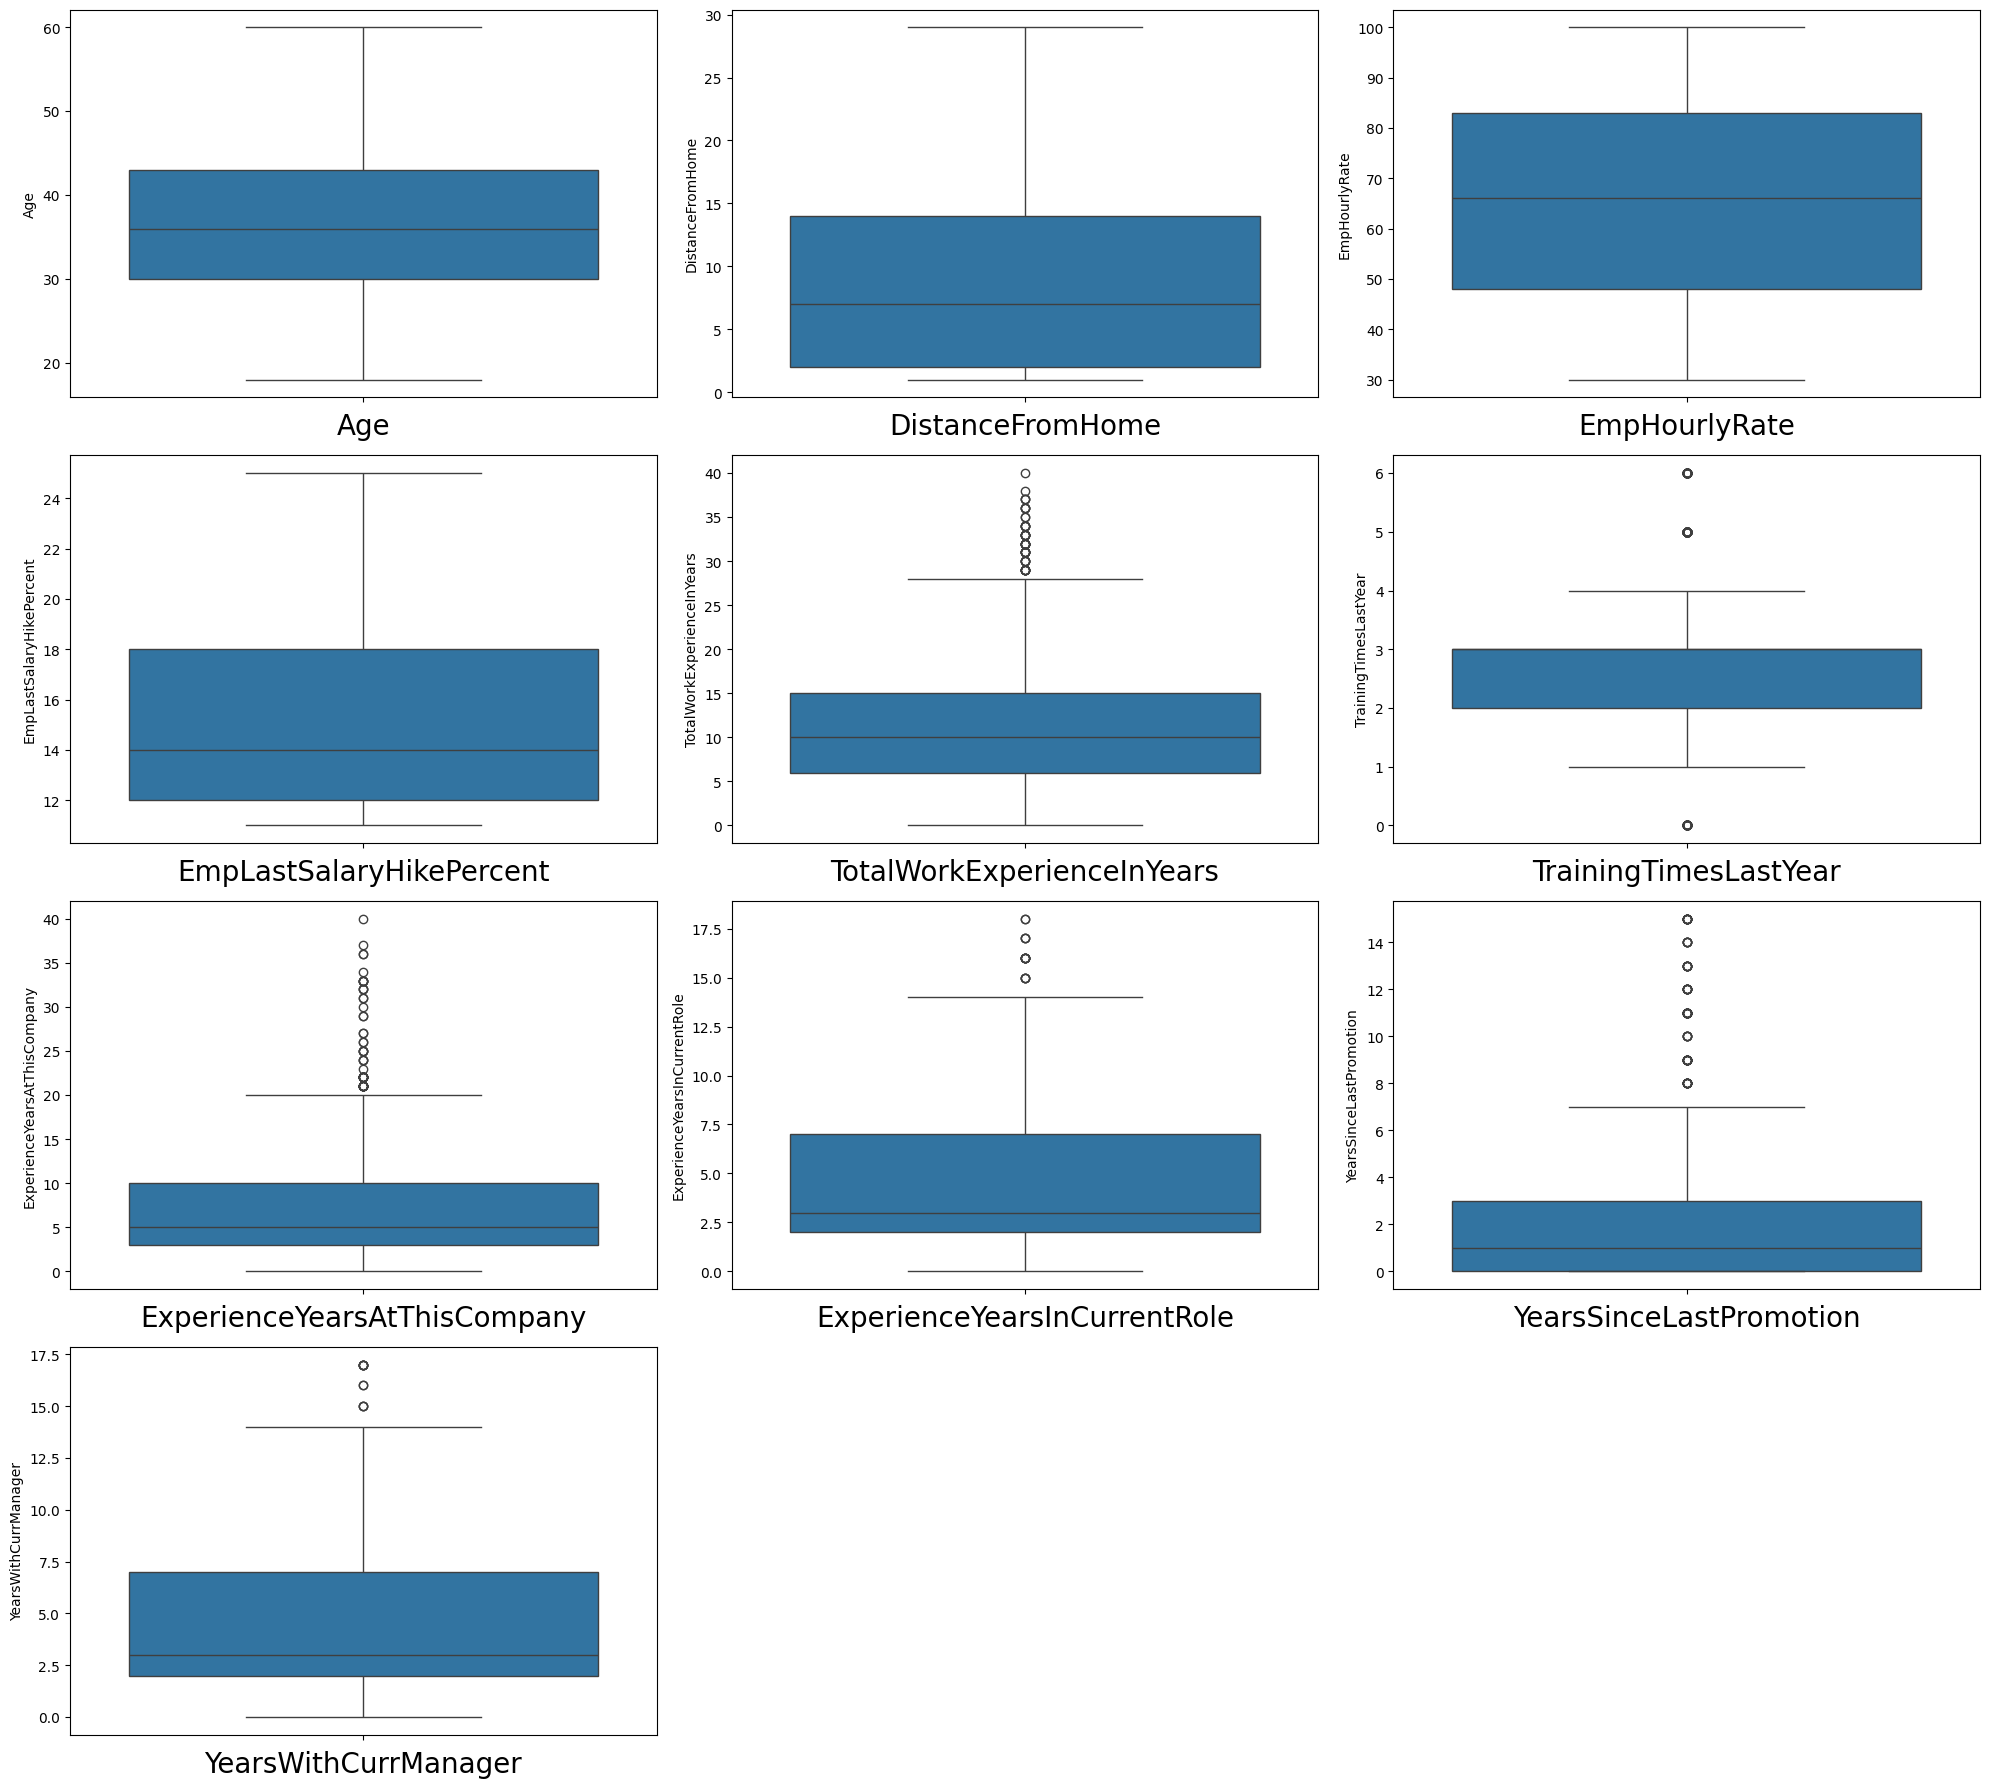

In [ ]:
out = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18))
plotno = 1

for column in out:
    if plotno<=12:
        plt.subplot(4,3,plotno)
        sns.boxplot(out[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()


**IQR:**
* IQR là viết tắt của khoảng liên tứ phân vị, Khi một tập dữ liệu có các giá trị ngoại lệ hoặc cực trị, chúng tôi tóm tắt một giá trị điển hình bằng cách sử dụng trung vị trái ngược với giá trị trung bình. là sự khác biệt giữa tứ phân vị thứ nhất và thứ ba

In [ ]:
columns = ['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for column in columns:
    print('===========================================================================================')
    print('Columns',column)
    print('===========================================================================================')
    q25, q75 = np.percentile(data[column], 25), np.percentile(data[column], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data[column] if x < lower or x > upper]
    outliers_removed = [x for x in data[column] if x >= lower and x <= upper]
    data.loc[data[column] > upper,column]=data[column].median()
    data.loc[data[column] < lower,column]=data[column].median()
    data = data[(data[column] <= upper) & (data[column] >= lower)]

Columns TotalWorkExperienceInYears
Percentiles: 25th=6.000, 75th=10.000, IQR=4.000
Columns TrainingTimesLastYear
Percentiles: 25th=2.000, 75th=3.000, IQR=1.000
Columns ExperienceYearsAtThisCompany
Percentiles: 25th=3.000, 75th=8.000, IQR=5.000
Columns ExperienceYearsInCurrentRole
Percentiles: 25th=2.000, 75th=7.000, IQR=5.000
Columns YearsSinceLastPromotion
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Columns YearsWithCurrManager
Percentiles: 25th=2.000, 75th=7.000, IQR=5.000


#### Kiểm tra outline

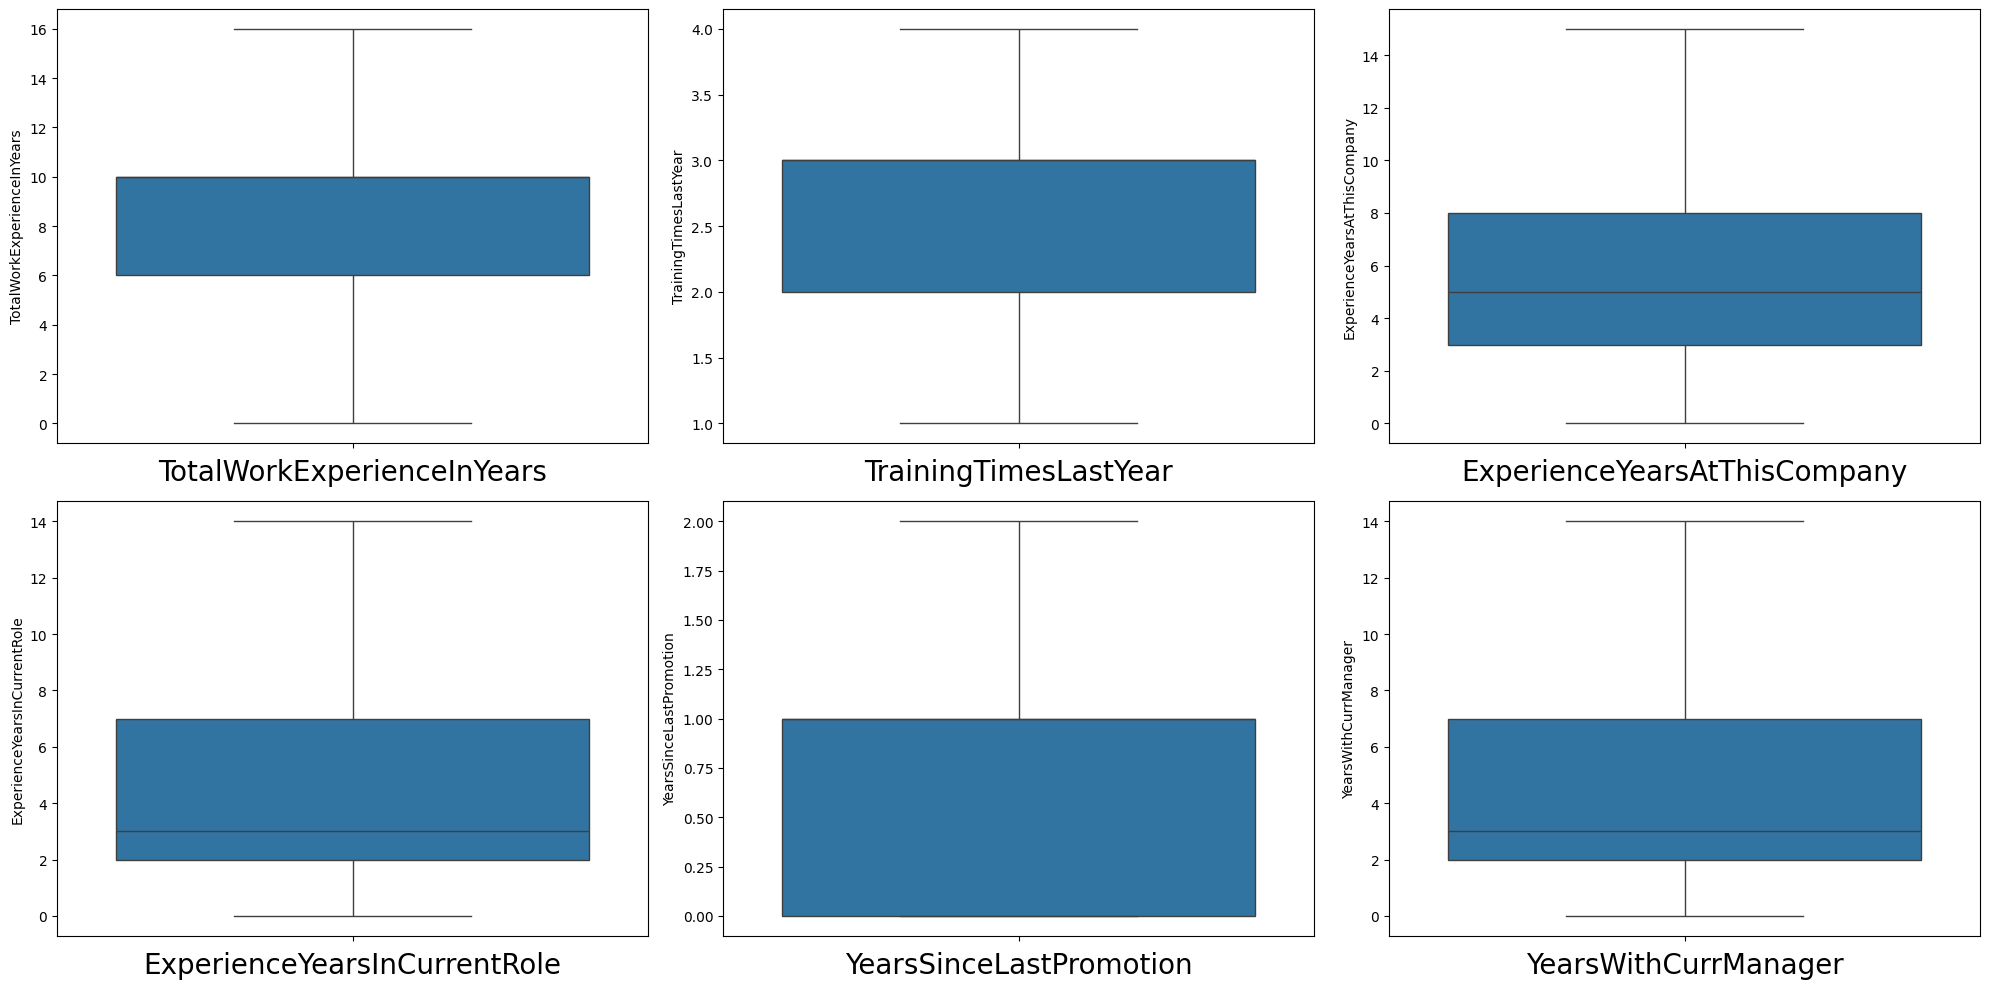

In [ ]:
out = data[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
              'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10))
plotno = 1

for column in out:
    if plotno<=7:
        plt.subplot(2,3,plotno)
        sns.boxplot(out[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()


Kiểm tra độ lệch độ nhọn


In [ ]:
print('Experiance Year At This Company Feature Skewness:',data.ExperienceYearsAtThisCompany.skew())
print('Year Since Last Promotion Feature Skewness:',data.YearsSinceLastPromotion.skew())
print('Year Since Last Promotion Feature kurtosis:',data.YearsSinceLastPromotion.kurtosis())
print('Experiance Year At This Company Feature kurtosis:',data.ExperienceYearsAtThisCompany.kurtosis())

Experiance Year At This Company Feature Skewness: 0.6024300249498777
Year Since Last Promotion Feature Skewness: 0.3490605611001394
Year Since Last Promotion Feature kurtosis: -0.7149935339288715
Experiance Year At This Company Feature kurtosis: -0.19101408527215336


### Chuẩn hóa dữ liệu

**Tỷ lệ chuẩn:**
Tiêu chuẩn hóa là quá trình tỷ lệ tính năng, nó giả định tính năng tuân theo phân phối chuẩn và tỷ lệ tính năng giữa giá trị trung bình và độ lệch chuẩn, ở đây giá trị trung bình là 0 và độ lệch chuẩn luôn là 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data.iloc[:,:-1] = scalar.fit_transform(data.iloc[:,:-1])

In [ ]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,-0.541458,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,-0.645573,-0.889111,1.185833,0.456578,-0.879579,-1.064491,1.315901,0.864098,-1.109305,1.202103,-0.417335,3
1,1.109888,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,-0.645573,-0.889111,1.185833,0.456578,-0.879579,0.365956,0.452386,0.864098,0.442171,0.902825,-0.417335,3
2,0.339260,0.809427,-0.943112,-0.132285,1.052350,0.833426,-0.876351,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1.549010,1.594054,0.255768,0.456578,-0.879579,0.365956,-0.123291,2.661702,0.442171,2.399219,-0.417335,4
3,0.449349,0.809427,-1.706766,-1.500751,-0.126754,-0.218658,0.596508,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,-0.645573,-0.061389,-0.674297,0.456578,-0.879579,-1.064491,-0.123291,0.564498,0.442171,0.603546,-0.417335,3
4,2.541054,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,-0.645573,-0.337297,1.185833,0.456578,-2.303999,0.365956,-0.986806,-0.633905,1.993646,-0.593570,-0.417335,3


### Lựa chọn đặc trưng

KIỂM TRA SỰ TƯƠNG QUAN

**Bản đồ nhiệt:** Bản đồ nhiệt là biểu diễn đồ họa của dữ liệu sử dụng hệ thống mã màu để biểu diễn các giá trị khác nhau.

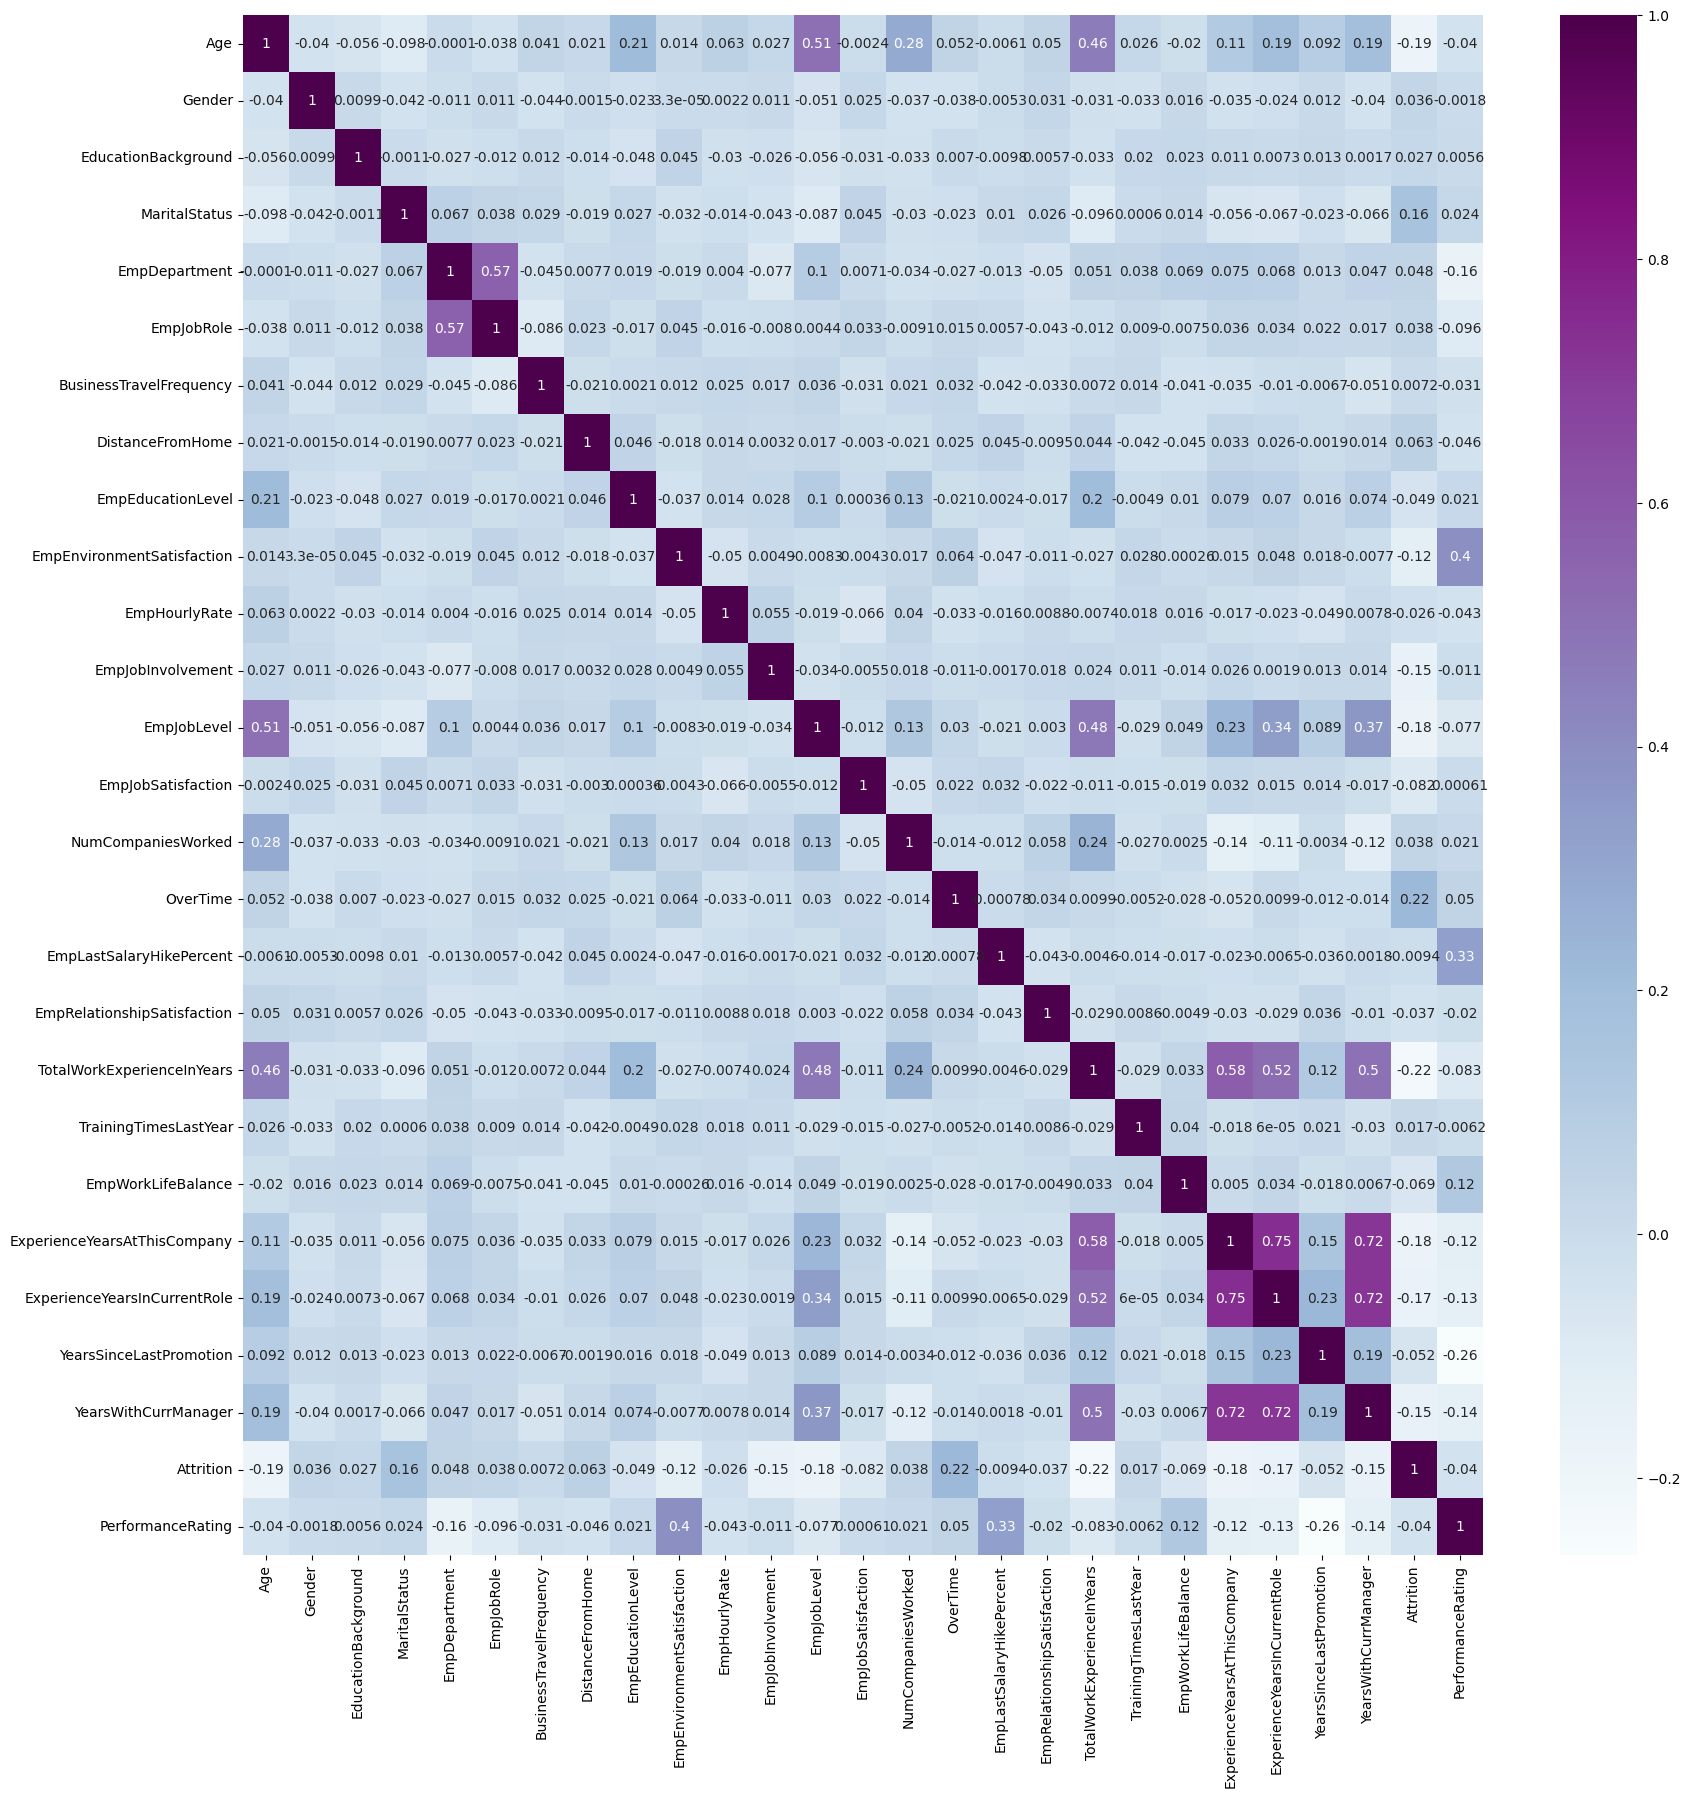

In [ ]:

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

In [ ]:
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


#### Phân tích thành phần chính

* Phân tích thành phần chính (PCA) là một kỹ thuật phổ biến để phân tích các tập dữ liệu lớn chứa nhiều chiều/tính năng trên mỗi quan sát, tăng khả năng diễn giải dữ liệu trong khi vẫn bảo toàn lượng thông tin tối đa và cho phép trực quan hóa dữ liệu đa chiều. Về mặt hình thức, PCA là một kỹ thuật thống kê để giảm chiều của một tập dữ liệu.

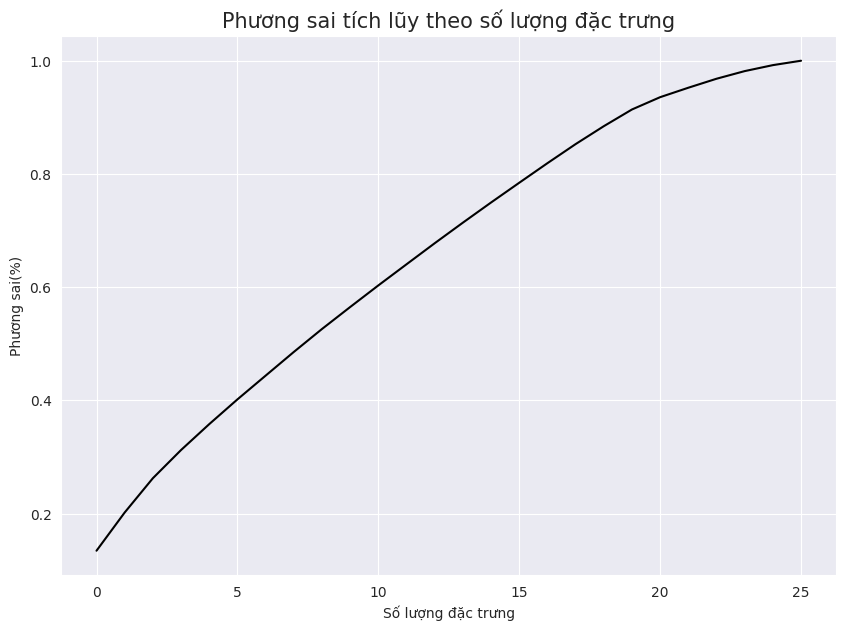

In [ ]:
from sklearn.decomposition import PCA

data1 = data.iloc[:,:-1]
pca = PCA()
principlecomponent = pca.fit_transform(data1)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Số lượng đặc trưng',fontsize=10)
plt.ylabel('Phương sai(%)',fontsize=10)
plt.title('Phương sai tích lũy theo số lượng đặc trưng',fontsize=15)
plt.show()

#Mô hình

#### Cắt đặc trưng

In [ ]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [ ]:
print(X.shape,y.shape)

(1200, 26) (1200,)


### Cân bằng đặc trưng mục tiêu

**SMOTE:** SMOTE (kỹ thuật lấy mẫu quá mức thiểu số tổng hợp) là một trong những phương pháp lấy mẫu quá mức được sử dụng phổ biến nhất để giải quyết vấn đề mất cân bằng. Nó nhằm mục đích cân bằng phân phối lớp bằng cách tăng ngẫu nhiên các ví dụ về lớp thiểu số bằng cách sao chép chúng. SMOTE tổng hợp các trường hợp thiểu số mới giữa các trường hợp thiểu số hiện có.

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


In [ ]:
X_sm.shape,y_sm.shape

((2622, 26), (2622,))

Cắt data để train

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.20)

Giảm chiều dữ liệu

In [ ]:
pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape, X_test_pca.shape, y_train.shape, y_test.shape

((2097, 25), (525, 25), (2097,), (525,))

####TẠO MÔ HÌNH, DỰ ĐOÁN VÀ ĐÁNH GIÁ


* Support Vector Machine
* Random Forest
* Mạng nơ-ron nhân tạo [MLP Classifier]

### 1.Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_pca,y_train)
svc_test_predict = svc.predict(X_test_pca)

ACCURACY

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,classification_report
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("Prcision Score:", precision_score(svc_test_predict, y_test, average='weighted')*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 96.57142857142857
Prcision Score: 96.80770473557607
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.99      0.96      0.98       189
           3       0.91      0.99      0.95       159
           4       1.00      0.95      0.97       177

    accuracy                           0.97       525
   macro avg       0.97      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



In [ ]:
joblib.dump(svc,'/content/drive/MyDrive/Project thi KHDL/Model/svc_96.57_model.pkl')

['/content/drive/MyDrive/Project thi KHDL/Model/svc_96.57_model.pkl']

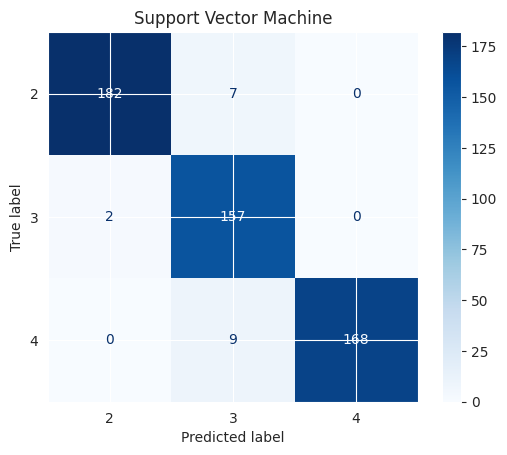

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(svc_test_predict,y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['2','3','4'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Support Vector Machine')
plt.show()

### 2.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_pca,y_train)
rf_test_predict = rf.predict(X_test_pca)

ACCURACY

In [ ]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Precision Score:", precision_score(rf_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 94.0952380952381
Precision Score: 94.56030013580367
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.97      0.93      0.95       193
           3       0.86      0.96      0.91       154
           4       0.99      0.94      0.97       178

    accuracy                           0.94       525
   macro avg       0.94      0.94      0.94       525
weighted avg       0.95      0.94      0.94       525



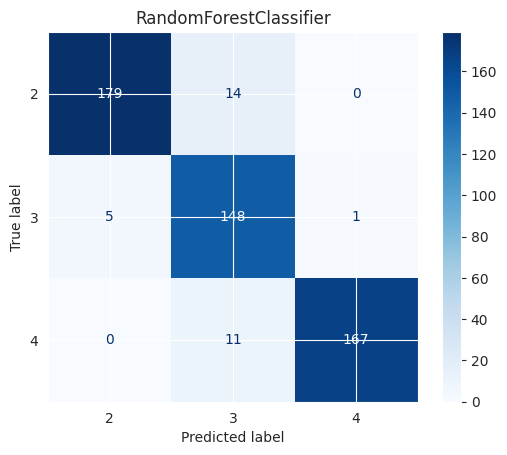

In [ ]:
cm = confusion_matrix(rf_test_predict,y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['2','3','4'])
disp.plot(cmap=plt.cm.Blues)
plt.title('RandomForestClassifier')
plt.show()

### 3.Artificial Neural Network [MLP Classifier]

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

model.fit(X_train_pca,y_train)
mlp_test_predict = model.predict(X_test_pca)

ACCURACY

In [ ]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Precision Score:",precision_score(mlp_test_predict, y_test, average='weighted')*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 95.04761904761905
Precision Score: 95.19543504760539
Classification report of testing:
               precision    recall  f1-score   support

           2       0.96      0.96      0.96       183
           3       0.90      0.95      0.92       165
           4       0.99      0.94      0.97       177

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



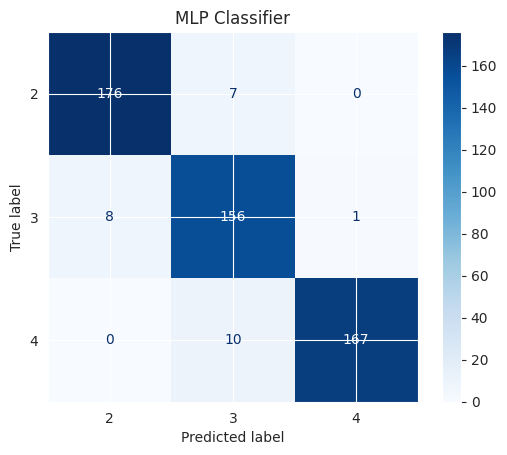

In [ ]:
cm = confusion_matrix(mlp_test_predict,y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['2','3','4'])
disp.plot(cmap=plt.cm.Blues)
plt.title('MLP Classifier')
plt.show()

###Trực quan hóa acc

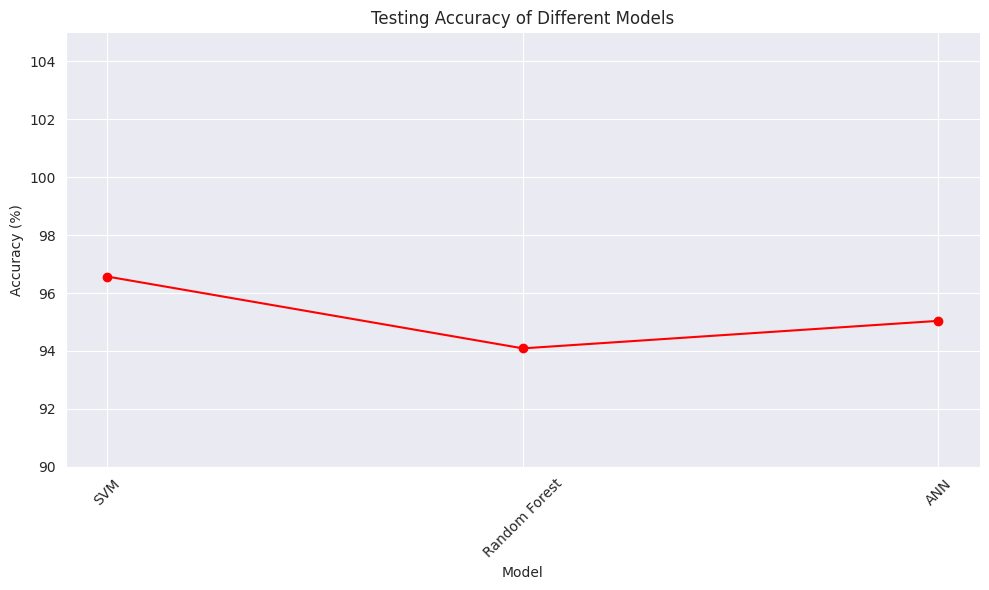

In [ ]:
import matplotlib.pyplot as plt


models = ['SVM', 'Random Forest', 'ANN']
testing_accuracies = [96.57,94.09,95.04]
plt.figure(figsize=(10, 6))
plt.plot(models, testing_accuracies, marker='o', linestyle='-', color='r', label='Testing Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Testing Accuracy of Different Models')
plt.ylim(90, 105)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data2 = pd.read_excel('/content/drive/MyDrive/Project thi KHDL/Data/Employee_Performance.xls')
data3 = data2.drop(['EmpNumber','PerformanceRating'],axis=1)
data3.head()

mlp = joblib.load('/content/drive/MyDrive/Project thi KHDL/Model/svc_96.57_model.pkl')
object_columns_list = data3.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in object_columns_list:
    data3[column] = label_encoder.fit_transform(data3[column])

# Chuẩn hóa dữ liệu mới
new_data_scaled = scalar.transform(data3)

# Giảm chiều dữ liệu mới bằng PCA
new_data_pca = pca.transform(new_data_scaled)

# Dự đoán với mô hình
new_prediction = mlp.predict(new_data_pca)
data2['dudoan'] = new_prediction

In [ ]:
data2.to_csv('/content/drive/MyDrive/Project thi KHDL/Data/data_submit2.csv',index=False)